In [2]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import seaborn as sns
from matplotlib import pyplot as plt

pysqldf = lambda q: sqldf(q, globals())

In [3]:
df = pd.read_csv('data/Most-Recent-Cohorts-Field-of-Study.csv')

In [4]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_colwidth', None)

In [6]:
df.head(1)

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,IPEDSCOUNT2,DEBT_ALL_STGP_ANY_N,DEBT_ALL_STGP_ANY_MEAN,DEBT_ALL_STGP_ANY_MDN,DEBT_ALL_STGP_EVAL_N,DEBT_ALL_STGP_EVAL_MEAN,DEBT_ALL_STGP_EVAL_MDN,DEBT_ALL_PP_ANY_N,DEBT_ALL_PP_ANY_MEAN,DEBT_ALL_PP_ANY_MDN,DEBT_ALL_PP_EVAL_N,DEBT_ALL_PP_EVAL_MEAN,DEBT_ALL_PP_EVAL_MDN,DEBT_MALE_STGP_ANY_N,DEBT_MALE_STGP_ANY_MEAN,DEBT_MALE_STGP_ANY_MDN,DEBT_MALE_STGP_EVAL_N,DEBT_MALE_STGP_EVAL_MEAN,DEBT_MALE_STGP_EVAL_MDN,DEBT_MALE_PP_ANY_N,DEBT_MALE_PP_ANY_MEAN,DEBT_MALE_PP_ANY_MDN,DEBT_MALE_PP_EVAL_N,DEBT_MALE_PP_EVAL_MEAN,DEBT_MALE_PP_EVAL_MDN,DEBT_NOTMALE_STGP_ANY_N,DEBT_NOTMALE_STGP_ANY_MEAN,DEBT_NOTMALE_STGP_ANY_MDN,DEBT_NOTMALE_STGP_EVAL_N,DEBT_NOTMALE_STGP_EVAL_MEAN,DEBT_NOTMALE_STGP_EVAL_MDN,DEBT_NOTMALE_PP_ANY_N,DEBT_NOTMALE_PP_ANY_MEAN,DEBT_NOTMALE_PP_ANY_MDN,DEBT_NOTMALE_PP_EVAL_N,DEBT_NOTMALE_PP_EVAL_MEAN,DEBT_NOTMALE_PP_EVAL_MDN,DEBT_PELL_STGP_ANY_N,DEBT_PELL_STGP_ANY_MEAN,DEBT_PELL_STGP_ANY_MDN,DEBT_PELL_STGP_EVAL_N,DEBT_PELL_STGP_EVAL_MEAN,DEBT_PELL_STGP_EVAL_MDN,DEBT_PELL_PP_ANY_N,DEBT_PELL_PP_ANY_MEAN,DEBT_PELL_PP_ANY_MDN,DEBT_PELL_PP_EVAL_N,DEBT_PELL_PP_EVAL_MEAN,DEBT_PELL_PP_EVAL_MDN,DEBT_NOPELL_STGP_ANY_N,DEBT_NOPELL_STGP_ANY_MEAN,DEBT_NOPELL_STGP_ANY_MDN,DEBT_NOPELL_STGP_EVAL_N,DEBT_NOPELL_STGP_EVAL_MEAN,DEBT_NOPELL_STGP_EVAL_MDN,DEBT_NOPELL_PP_ANY_N,DEBT_NOPELL_PP_ANY_MEAN,DEBT_NOPELL_PP_ANY_MDN,DEBT_NOPELL_PP_EVAL_N,DEBT_NOPELL_PP_EVAL_MEAN,DEBT_NOPELL_PP_EVAL_MDN,DEBT_ALL_PP_ANY_MDN10YRPAY,DEBT_ALL_PP_EVAL_MDN10YRPAY,DEBT_ALL_STGP_ANY_MDN10YRPAY,DEBT_ALL_STGP_EVAL_MDN10YRPAY,EARN_COUNT_NWNE_HI_1YR,EARN_CNTOVER150_HI_1YR,EARN_COUNT_WNE_HI_1YR,EARN_MDN_HI_1YR,EARN_COUNT_NWNE_HI_2YR,EARN_CNTOVER150_HI_2YR,EARN_COUNT_WNE_HI_2YR,EARN_MDN_HI_2YR
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelors Degree,NaN,NaN,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed,PrivacySuppressed


In [25]:
df_bsmscs = pysqldf("""
SELECT DISTINCT 
    INSTNM, 
    CIPDESC, 
    CREDDESC, 
    CREDLEV, 
    CIPCODE,
    EARN_MDN_HI_1YR * 1.0 AS EARN_MED_1YR, 
    DEBT_ALL_STGP_EVAL_MDN * 1.0 AS DEBT_MED,
    EARN_COUNT_WNE_HI_1YR * 1 AS COHORT_SIZE
FROM 
    df
WHERE 
    CIPCODE IN (1104, 1107, 1101)
AND 
    (CREDLEV = 3 OR CREDLEV = 5)
AND 
    EARN_MED_1YR > 0
ORDER BY INSTNM
""")

In [130]:
df_bsmscs

,INSTNM,CIPDESC,CREDDESC,CREDLEV,CIPCODE,EARN_MED_1YR,DEBT_MED,COHORT_SIZE
0,Alabama A & M University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,54300.0,36250.0,33
1,Alabama State University,Information Science/Studies.,Bachelors Degree,3,1104,25500.0,32672.0,22
2,Altierus Career College-Tampa,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,29700.0,52386.0,43
3,American InterContinental University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,43100.0,40139.0,207
4,American InterContinental University,"Computer and Information Sciences, General.",Master's Degree,5,1101,47600.0,36117.0,104
5,American InterContinental University-Atlanta,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,43100.0,40139.0,207
6,American InterContinental University-Atlanta,"Computer and Information Sciences, General.",Master's Degree,5,1101,47600.0,36117.0,104
7,American InterContinental University-Houston,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,43100.0,40139.0,207
8,American Public University System,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,48900.0,29624.0,90
9,Angelo State University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,43300.0,21745.0,23


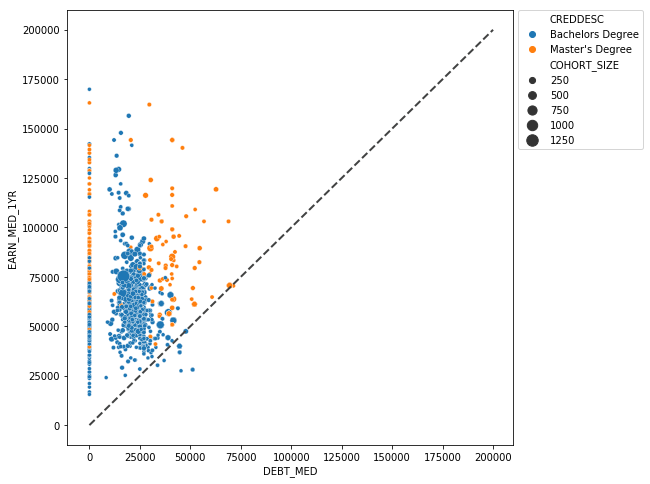

In [8]:
plt.figure(figsize=(8,8))
plt.plot([0,200000],[0,200000], lw=2, color='#414242', linestyle='dashed')
sns.scatterplot(data=df_bsmscs, y="EARN_MED_1YR", x="DEBT_MED", hue="CREDDESC", size="COHORT_SIZE", sizes = (15,150))
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [48]:
# how about from the same program?

In [100]:
df_bsmscs.columns

Index(['INSTNM', 'CIPDESC', 'CREDDESC', 'CREDLEV', 'CIPCODE', 'EARN_MED_1YR',
       'DEBT_MED', 'COHORT_SIZE'],
      dtype='object')

In [103]:
df_ij = pysqldf("""
SELECT
    bs.INSTNM, bs.CIPDESC, bs.CREDLEV, bs.EARN_MED_1YR, ms.CREDLEV, ms.EARN_MED_1YR
FROM
    df_bsmscs bs
JOIN
    df_bsmscs ms
ON
    bs.INSTNM = ms.INSTNM AND bs.CIPDESC = ms.CIPDESC
WHERE
    bs.CREDLEV = 3
AND
    ms.CREDLEV = 5
""")

In [104]:
df_ij

,INSTNM,CIPDESC,CREDLEV,EARN_MED_1YR,CREDLEV,EARN_MED_1YR
0,American InterContinental University,"Computer and Information Sciences, General.",3,43100.0,5,47600.0
1,American InterContinental University-Atlanta,"Computer and Information Sciences, General.",3,43100.0,5,47600.0
2,Boston University,Computer Science.,3,78200.0,5,106300.0
3,CUNY Bernard M Baruch College,Information Science/Studies.,3,42800.0,5,94400.0
4,California State University-Fullerton,Computer Science.,3,63200.0,5,75100.0
5,Capella University,"Computer and Information Sciences, General.",3,65700.0,5,74000.0
6,Colorado State University-Fort Collins,Information Science/Studies.,3,61100.0,5,79200.0
7,Colorado Technical University-Colorado Springs,"Computer and Information Sciences, General.",3,54300.0,5,59700.0
8,Colorado Technical University-Colorado Springs,Computer Science.,3,59500.0,5,68600.0
9,Columbia University in the City of New York,Computer Science.,3,96400.0,5,132500.0


In [105]:
df_ij.describe()

,CREDLEV,EARN_MED_1YR,CREDLEV,EARN_MED_1YR
count,102.0,102.000000,102.0,102.000000
mean,3.0,61696.078431,5.0,77358.823529
std,0.0,16951.975974,0.0,22624.469155
min,3.0,32400.000000,5.0,43100.000000
25%,3.0,49300.000000,5.0,60200.000000
50%,3.0,61000.000000,5.0,69600.000000
75%,3.0,65900.000000,5.0,86100.000000
max,3.0,135200.000000,5.0,153400.000000


In [106]:
# considered separately

In [107]:
df_bs = pysqldf("""
SELECT 
    bs.INSTNM, bs.CREDLEV, bs.EARN_MED_1YR
FROM
    df_bsmscs bs
WHERE 
     bs.CREDLEV = 3
""")

In [108]:
df_bs.describe()

,CREDLEV,EARN_MED_1YR
count,738.0,738.000000
mean,3.0,57968.970190
std,0.0,16144.679126
min,3.0,25500.000000
25%,3.0,48025.000000
50%,3.0,56200.000000
75%,3.0,64800.000000
max,3.0,153300.000000


In [109]:
df_ms = pysqldf("""
SELECT 
    ms.INSTNM, ms.CREDLEV, ms.EARN_MED_1YR
FROM
    df_bsmscs ms
WHERE 
     ms.CREDLEV = 5
""")

In [110]:
df_ms.describe()

,CREDLEV,EARN_MED_1YR
count,133.0,133.000000
mean,5.0,77937.593985
std,0.0,22194.104464
min,5.0,34100.000000
25%,5.0,60200.000000
50%,5.0,70300.000000
75%,5.0,90500.000000
max,5.0,153400.000000


In [119]:
# just for CS
df_ij = pysqldf("""
SELECT
    bs.INSTNM, bs.CIPDESC, bs.CREDLEV, bs.EARN_MED_1YR as BS_MED, ms.CREDLEV, ms.EARN_MED_1YR AS MS_MED
FROM
    df_bsmscs bs
JOIN
    df_bsmscs ms
ON
    bs.INSTNM = ms.INSTNM AND bs.CIPDESC = ms.CIPDESC
WHERE
    bs.CREDLEV = 3
AND
    ms.CREDLEV = 5
AND 
    ms.CIPCODE = 1107
ORDER BY MS_MED DESC
""")

In [120]:
df_ij

,INSTNM,CIPDESC,CREDLEV,BS_MED,CREDLEV,MS_MED
0,Stanford University,Computer Science.,3,126400.0,5,153400.0
1,University of California-San Diego,Computer Science.,3,80800.0,5,141200.0
2,Columbia University in the City of New York,Computer Science.,3,96400.0,5,132500.0
3,University of Illinois at Urbana-Champaign,Computer Science.,3,92200.0,5,123100.0
4,Cornell University,Computer Science.,3,116300.0,5,113700.0
5,University of Southern California,Computer Science.,3,85200.0,5,108200.0
6,Boston University,Computer Science.,3,78200.0,5,106300.0
7,University of Colorado Boulder,Computer Science.,3,70100.0,5,91100.0
8,Drexel University,Computer Science.,3,74800.0,5,86400.0
9,University of Chicago,Computer Science.,3,87000.0,5,85200.0


In [121]:
df_ij.describe()

,CREDLEV,BS_MED,CREDLEV,MS_MED
count,14.0,14.000000,14.0,14.000000
mean,3.0,81300.000000,5.0,102414.285714
std,0.0,21720.426402,0.0,27401.259296
min,3.0,51400.000000,5.0,68600.000000
25%,3.0,64925.000000,5.0,79500.000000
50%,3.0,79500.000000,5.0,98700.000000
75%,3.0,90900.000000,5.0,120750.000000
max,3.0,126400.000000,5.0,153400.000000


In [12]:
# what about post-bacs in computer science
# unfortunately, none are reporting data

In [13]:
df_pbscs = pysqldf("""
SELECT DISTINCT 
    INSTNM, 
    CIPDESC, 
    CREDDESC, 
    CREDLEV, 
    CIPCODE,
    EARN_MDN_HI_1YR * 1.0 AS EARN_MED_1YR, 
    DEBT_ALL_STGP_EVAL_MDN * 1.0 AS DEBT_MED,
    EARN_COUNT_WNE_HI_1YR * 1 AS COHORT_SIZE
FROM 
    df
WHERE 
    --CIPCODE IN (1104, 1107, 1101)
    CIPCODE = 1107
AND 
    (CREDLEV = 4)
ORDER BY INSTNM
""")

In [14]:
df_pbscs

,INSTNM,CIPDESC,CREDDESC,CREDLEV,CIPCODE,EARN_MED_1YR,DEBT_MED,COHORT_SIZE
0,Georgetown University,Computer Science.,Post-baccalaureate Certificate,4,1107,0.0,0.0,0
1,Indiana University-Northwest,Computer Science.,Post-baccalaureate Certificate,4,1107,0.0,0.0,0
2,North Carolina State University at Raleigh,Computer Science.,Post-baccalaureate Certificate,4,1107,0.0,0.0,0
3,Simpson College,Computer Science.,Post-baccalaureate Certificate,4,1107,0.0,0.0,0
4,Texas State University,Computer Science.,Post-baccalaureate Certificate,4,1107,0.0,0.0,0


In [9]:
pysqldf("SELECT DISTINCT CREDLEV, CREDDESC FROM df")

,CREDLEV,CREDDESC
0,3,Bachelors Degree
1,5,Master's Degree
2,6,Doctoral Degree
3,8,Graduate/Professional Certificate
4,7,First Professional Degree
5,1,Undergraduate Certificate or Diploma
6,2,Associate's Degree
7,4,Post-baccalaureate Certificate


In [19]:
df_bsmseng = pysqldf("""
SELECT DISTINCT 
    INSTNM, 
    CIPDESC, 
    CREDDESC, 
    CREDLEV, 
    CIPCODE,
    EARN_MDN_HI_1YR * 1.0 AS EARN_MED_1YR, 
    DEBT_ALL_STGP_EVAL_MDN * 1.0 AS DEBT_MED,
    EARN_COUNT_WNE_HI_1YR * 1 AS COHORT_SIZE
FROM 
    df
WHERE 
    CIPCODE LIKE '14%'
AND 
    (CREDLEV = 3 OR CREDLEV = 5)
AND 
    EARN_MED_1YR > 0
ORDER BY INSTNM
""")

In [20]:
df_bsmsstem

,INSTNM,CIPDESC,CREDDESC,CREDLEV,CIPCODE,EARN_MED_1YR,DEBT_MED,COHORT_SIZE
0,AI Miami International University of Art and Design,Computer Software and Media Applications.,Bachelors Degree,3,1108,38400.0,40857.0,0
1,Academy of Art University,Computer Software and Media Applications.,Bachelors Degree,3,1108,46500.0,37693.0,54
2,Academy of Art University,Computer Software and Media Applications.,Master's Degree,5,1108,72800.0,102630.0,43
3,Alabama A & M University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,54300.0,36250.0,33
4,Alabama A & M University,"Electrical, Electronics and Communications Engineering.",Bachelors Degree,3,1410,54500.0,38618.0,31
5,Alabama A & M University,Mechanical Engineering.,Bachelors Degree,3,1419,45800.0,36928.0,24
6,Alabama State University,Information Science/Studies.,Bachelors Degree,3,1104,25500.0,32672.0,22
7,Alfred University,Mechanical Engineering.,Bachelors Degree,3,1419,58000.0,27000.0,35
8,Altierus Career College-Tampa,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,29700.0,52386.0,43
9,American InterContinental University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,43100.0,40139.0,207


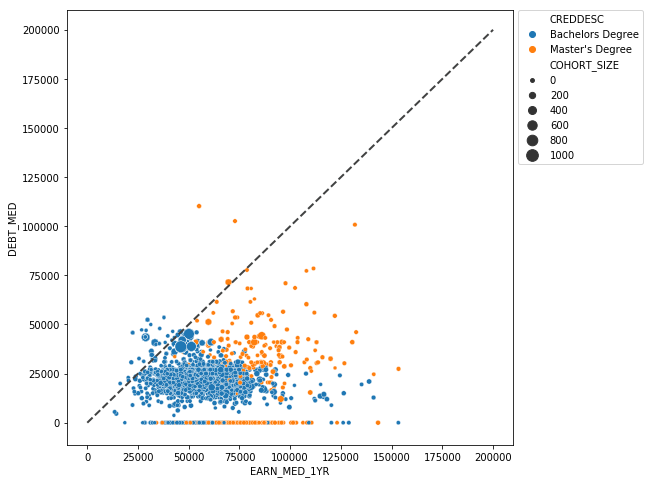

In [24]:
plt.figure(figsize=(8,8))
plt.plot([0,200000],[0,200000], lw=2, color='#414242', linestyle='dashed')
sns.scatterplot(data=df_bsmsstem, x="EARN_MED_1YR", y="DEBT_MED", hue="CREDDESC", size="COHORT_SIZE", sizes = (15,150))
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [25]:
# now take a look at both programs within the ame university
df_ij = pysqldf("""
SELECT
    bs.INSTNM, bs.CIPDESC, bs.CREDLEV, bs.EARN_MED_1YR as BS_MED, ms.CREDLEV, ms.EARN_MED_1YR AS MS_MED
FROM
    df_bsmseng bs
JOIN
    df_bsmseng ms
ON
    bs.INSTNM = ms.INSTNM AND bs.CIPDESC = ms.CIPDESC
WHERE
    bs.CREDLEV = 3
AND
    ms.CREDLEV = 5
ORDER BY MS_MED DESC
""")

In [26]:
df_ij

,INSTNM,CIPDESC,CREDLEV,BS_MED,CREDLEV,MS_MED
0,Massachusetts Institute of Technology,"Electrical, Electronics and Communications Engineering.",3,116600.0,5,143300.0
1,Carnegie Mellon University,"Electrical, Electronics and Communications Engineering.",3,99000.0,5,113000.0
2,Columbia University in the City of New York,Operations Research.,3,79000.0,5,111500.0
3,The University of Texas at Austin,"Electrical, Electronics and Communications Engineering.",3,76300.0,5,110400.0
4,University of California-San Diego,"Engineering, Other.",3,50000.0,5,109700.0
5,Massachusetts Institute of Technology,Mechanical Engineering.,3,75100.0,5,108700.0
6,Santa Clara University,Computer Engineering.,3,93300.0,5,103000.0
7,Stanford University,Mechanical Engineering.,3,78200.0,5,102700.0
8,University of Washington-Seattle Campus,"Aerospace, Aeronautical and Astronautical Engineering.",3,60300.0,5,101600.0
9,University of Washington-Bothell Campus,"Electrical, Electronics and Communications Engineering.",3,68200.0,5,99500.0


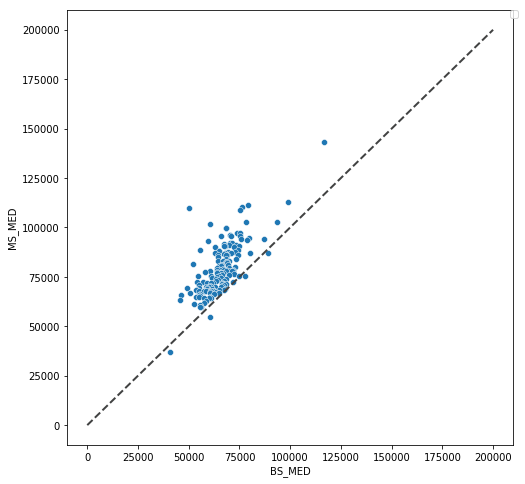

In [32]:
plt.figure(figsize=(8,8))
plt.plot([0,200000],[0,200000], lw=2, color='#414242', linestyle='dashed')
sns.scatterplot(data=df_ij, x="BS_MED", y="MS_MED")
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)

In [34]:
df_bsmscs

,INSTNM,CIPDESC,CREDDESC,CREDLEV,CIPCODE,EARN_MED_1YR,DEBT_MED,COHORT_SIZE
0,Adelphi University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,49683.0,25500.0,11
1,Adelphi University,Information Science/Studies.,Bachelors Degree,3,1104,48432.0,0.0,11
2,Alabama A & M University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,67101.0,35000.0,22
3,Alabama A & M University,"Computer and Information Sciences, General.",Master's Degree,5,1101,47666.0,0.0,13
4,Alabama State University,Information Science/Studies.,Bachelors Degree,3,1104,30305.0,33750.0,36
5,Albany State University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,32711.0,37000.0,21
6,Albright College,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,42682.0,0.0,12
7,Albright College,Information Science/Studies.,Bachelors Degree,3,1104,53775.0,25000.0,17
8,Altierus Career College-Tampa,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,28055.0,51166.0,42
9,American InterContinental University,"Computer and Information Sciences, General.",Bachelors Degree,3,1101,44257.0,38942.0,174


In [26]:
df_bscs = pysqldf("""
SELECT * FROM df_bsmscs
WHERE CREDLEV = 3
""")

df_mscs = pysqldf("""
SELECT * FROM df_bsmscs
WHERE CREDLEV = 5
""")

In [28]:
#df_bscs

In [63]:
df_ms_vs_bs = pysqldf("""
SELECT 
    bs.INSTNM,
    --bs.CIPDESC,
    bs.EARN_MED_1YR * 1.0 as bs_med,
    ms.EARN_MED_1YR  * 1.0 as ms_med
    --(ms.EARN_MED_1YR* 1.0 -  bs.EARN_MED_1YR * 1.0) AS diff
FROM
    df_bscs bs
JOIN
    df_mscs ms
ON 
    bs.INSTNM = ms.INSTNM
AND
    bs.CIPDESC = ms.CIPDESC
AND 
    bs.CIPDESC = 'Computer Science.'
--ORDER BY diff DESC
""")

In [66]:
df_ms_vs_bs.set_index("INSTNM")

,bs_med,ms_med
INSTNM,,
Arizona State University-Tempe,73870.0,101964.0
Binghamton University,73112.0,97907.0
Boston University,86550.0,117076.0
Brandeis University,86313.0,100414.0
Brown University,136278.0,125015.0
California State Polytechnic University-Pomona,62012.0,94408.0
California State University-Fullerton,66653.0,94408.0
California State University-Los Angeles,48432.0,106421.0
California State University-Northridge,68219.0,94408.0


In [71]:
df_ms_vs_bs.T.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44
INSTNM,Arizona State University-Tempe,Binghamton University,Boston University,Brandeis University,Brown University,California State Polytechnic University-Pomona,California State University-Fullerton,California State University-Los Angeles,California State University-Northridge,Colorado Technical University-Colorado Springs,Columbia University in the City of New York,Cornell University,Drexel University,Franklin University,Frostburg State University,George Washington University,Hofstra University,Illinois Institute of Technology,National University,North Carolina A & T State University,North Carolina State University at Raleigh,Northeastern Illinois University,Northern Illinois University,Pace University,Portland State University,Purdue University-Main Campus,Rensselaer Polytechnic Institute,Rochester Institute of Technology,San Jose State University,Stanford University,Stevens Institute of Technology,Towson University,University of California-San Diego,University of Chicago,University of Colorado Boulder,University of Illinois at Springfield,University of Illinois at Urbana-Champaign,University of Massachusetts-Amherst,University of Massachusetts-Lowell,University of Missouri-St Louis,University of North Carolina at Charlotte,University of Oklahoma-Norman Campus,University of Southern California,University of Wisconsin-Milwaukee,Washington University in St Louis
bs_med,73870,73112,86550,86313,136278,62012,66653,48432,68219,61516,107089,129394,75775,69338,52941,77966,55964,67660,66449,69338,74576,55286,60848,56641,82882,86215,91211,83325,77536,147858,83388,67995,85918,90856,73769,62409,117393,80038,75573,64493,60207,75921,94851,63997,108649
ms_med,101964,97907,117076,100414,125015,94408,94408,106421,94408,80718,140259,144240,116679,84653,59124,88198,74576,94408,73949,84599,103078,84653,72796,74200,106421,97071,119061,106421,106421,162153,89968,88342,139414,103078,101072,79808,163014,97071,92632,103078,84653,86867,116456,84653,101964


In [70]:
df_ms_vs_bs.set_index("INSTNM")
df_ms_vs_bs.T.plot()
plt.xticks(rotation=90)

TypeError: no numeric data to plot